# **CDD_ML**


building a machine learning model using the ChEMBL bioactivity data.

---

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0


## **Importing libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search**

In [ ]:
#@title
# Target search
target = new_client.target
target_query = target.search('DNMT1')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,DNA (cytosine-5)-methyltransferase 1,19.00,False,CHEMBL3351195,"[{'accession': 'P13864', 'component_descriptio...",SINGLE PROTEIN,10090
1,"[{'xref_id': 'P26358', 'xref_name': None, 'xre...",Homo sapiens,DNA (cytosine-5)-methyltransferase 1,18.00,False,CHEMBL1993,"[{'accession': 'P26358', 'component_descriptio...",SINGLE PROTEIN,9606


### **Select and retrieve bioactivity data for *Target Protein* (Ususally first entry)**

[link text](https://)We will assign the first entry (which corresponds to the target protein) to the ***selected_target*** variable

In [ ]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL1993'

Here, we will retrieve only bioactivity data for *Target Protein*

---

(CHEMBL1978) that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1671884,[],CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,1671886,[],CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,2676536,[],CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
3,None,2676537,[],CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,uM,UO_0000065,None,300.0
4,None,2676538,[],CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,mM,UO_0000065,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,None,23269267,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4835061,Inhibition of human DNMT1 enzyme using polydeo...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,nM,UO_0000065,None,10.0
468,None,23269268,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4835061,Inhibition of human DNMT1 enzyme using polydeo...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,nM,UO_0000065,None,10.0
469,None,23269269,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4835061,Inhibition of human DNMT1 enzyme using polydeo...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,nM,UO_0000065,None,10.0
470,None,23280162,[],CHEMBL4836935,Inhibition of DNMT (unknown origin) by densito...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,nM,UO_0000065,None,115.0


In [ ]:
df.standard_type.unique()

array(['IC50'], dtype=object)

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [ ]:
df.to_csv('bioactivity_data.csv', index=False)

## **Copying files to Google Drive**

Firstly, we need to mount the Google Drive into Colab so that we can have access to our Google adrive from within Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


Next, we create a **data** folder in our **Colab Notebooks** folder on Google Drive.

In [ ]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/DNMT1"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/DNMT1’: File exists


In [ ]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/DNMT1"

In [ ]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/DNMT1"

total 297
-rw------- 1 root root 262029 May 27 18:48 bioactivity_data.csv
-rw------- 1 root root  41322 May 25 07:08 bioactivity_preprocessed_data.csv


Let's see the CSV files that we have so far.

In [ ]:
! ls

bioactivity_data.csv  drive  gdrive  sample_data


Taking a glimpse of the **bioactivity_data.csv** file that we've just created.

In [ ]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,1671884,[],CHEMBL862798,Inhibitory activity against DNA methyl transferase in leukemic NALM6 cells,B,,,BAO_0000190,BAO_0000219,cell-based format,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,,,CHEMBL1147744,J Med Chem,2006.0,"{'bei': '13.68', 'le': '0.25', 'lle': '1.83', 'sei': '6.62'}",CHEMBL382617,,CHEMBL382617,4.00,0,http://www

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df[df.canonical_smiles.notna()]
df2.head(4)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1671884,[],CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,uM,UO_0000065,None,100.0
1,None,1671886,[],CHEMBL862798,Inhibitory activity against DNA methyl transfe...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,2676536,[],CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,uM,UO_0000065,None,2.0
3,None,2676537,[],CHEMBL1036408,Inhibition of human recombinant DNMT1 expresse...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,DNA (cytosine-5)-methyltransferase 1,9606,None,None,IC50,uM,UO_0000065,None,300.0


## **Data pre-processing of the bioactivity data**

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if i is not None and float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif i is not None and float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### **Iterate the *molecule_chembl_id* to a list**

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

### **Iterate *canonical_smiles* to a list**

In [ ]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

### **Iterate *standard_value* to a list**

In [ ]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

### **Combine the 4 lists into a dataframe**

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,inactive,100000.0
1,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,inactive,50000.0
2,CHEMBL418052,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...,intermediate,2000.0
3,CHEMBL563570,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,inactive,300000.0
4,CHEMBL559715,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3c(=O)[nH]cnc32...,inactive,1000000.0
...,...,...,...,...
467,CHEMBL4850570,COc1cc2nc(-c3cc(C)oc3C)cc(NCC3CCN(c4ncc(C(=O)N...,active,10.0
468,CHEMBL4871621,COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,active,10.0
469,CHEMBL4854765,COc1cc2nc(-c3ccc(C)o3)nc(NCC3CCN(c4ncc(C(=O)NO...,active,10.0
470,CHEMBL1564869,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,active,115.0


### **Alternative method**

Saves dataframe to CSV file

In [ ]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [ ]:
! ls -l

ls: cannot access 'drive': Transport endpoint is not connected
total 308
-rw-r--r-- 1 root root 262029 May 27 18:48 bioactivity_data.csv
-rw-r--r-- 1 root root  41322 May 27 18:48 bioactivity_preprocessed_data.csv
d????????? ? ?    ?         ?            ? drive
drwx------ 5 root root   4096 May 27 18:48 gdrive
drwxr-xr-x 1 root root   4096 May 25 13:42 sample_data


Let's copy to the Google Drive

In [ ]:
! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/DNMT1"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/DNMT1"

bioactivity_data.csv  bioactivity_preprocessed_data.csv


---

# *Exploratory Data Analysis**

Building a machine learning model using the ChEMBL bioactivity data.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-05-27 18:48:55--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   193MB/s    in 0.4s    

2023-05-27 18:48:56 (193 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
# Install RDKit
!pip install rdkit

# Import RDKit modules
#from rdkit import Chem
#from rdkit.Chem import Descriptors, Lipinski

# Your code using RDKit goes here
# ...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.4 MB/s 


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,292.35,2.17,0.00,6.00
1,334.33,2.46,2.00,3.00
2,384.42,-1.44,5.00,11.00
3,369.40,-1.02,4.00,10.00
4,385.40,-1.73,5.00,10.00
...,...,...,...,...
467,532.60,4.37,3.00,10.00
468,534.64,4.53,3.00,10.00
469,519.56,3.45,3.00,11.00
470,334.33,2.46,2.00,3.00


In [ ]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,inactive,100000.00
1,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,inactive,50000.00
2,CHEMBL418052,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...,intermediate,2000.00
3,CHEMBL563570,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,inactive,300000.00
4,CHEMBL559715,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3c(=O)[nH]cnc32...,inactive,1000000.00
...,...,...,...,...
467,CHEMBL4850570,COc1cc2nc(-c3cc(C)oc3C)cc(NCC3CCN(c4ncc(C(=O)N...,active,10.00
468,CHEMBL4871621,COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,active,10.00
469,CHEMBL4854765,COc1cc2nc(-c3ccc(C)o3)nc(NCC3CCN(c4ncc(C(=O)NO...,active,10.00
470,CHEMBL1564869,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,active,115.00


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,inactive,100000.00,292.35,2.17,0.00,6.00
1,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,inactive,50000.00,334.33,2.46,2.00,3.00
2,CHEMBL418052,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...,intermediate,2000.00,384.42,-1.44,5.00,11.00
3,CHEMBL563570,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,inactive,300000.00,369.40,-1.02,4.00,10.00
4,CHEMBL559715,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3c(=O)[nH]cnc32...,inactive,1000000.00,385.40,-1.73,5.00,10.00
...,...,...,...,...,...,...,...,...
467,CHEMBL4850570,COc1cc2nc(-c3cc(C)oc3C)cc(NCC3CCN(c4ncc(C(=O)N...,active,10.00,532.60,4.37,3.00,10.00
468,CHEMBL4871621,COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,active,10.00,534.64,4.53,3.00,10.00
469,CHEMBL4854765,COc1cc2nc(-c3ccc(C)o3)nc(NCC3CCN(c4ncc(C(=O)NO...,active,10.00,519.56,3.45,3.00,11.00
470,CHEMBL1564869,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,active,115.00,334.33,2.46,2.00,3.00


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df.standard_value.describe()

count       465.00
mean      35134.20
std      118304.12
min           0.30
25%        1180.00
50%        5320.00
75%       12200.00
max     1600000.00
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,inactive,292.35,2.17,0.00,6.00,100000.00
1,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,inactive,334.33,2.46,2.00,3.00,50000.00
2,CHEMBL418052,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...,intermediate,384.42,-1.44,5.00,11.00,2000.00
3,CHEMBL563570,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,inactive,369.40,-1.02,4.00,10.00,300000.00
4,CHEMBL559715,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3c(=O)[nH]cnc32...,inactive,385.40,-1.73,5.00,10.00,1000000.00
...,...,...,...,...,...,...,...,...
467,CHEMBL4850570,COc1cc2nc(-c3cc(C)oc3C)cc(NCC3CCN(c4ncc(C(=O)N...,active,532.60,4.37,3.00,10.00,10.00
468,CHEMBL4871621,COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,active,534.64,4.53,3.00,10.00,10.00
469,CHEMBL4854765,COc1cc2nc(-c3ccc(C)o3)nc(NCC3CCN(c4ncc(C(=O)NO...,active,519.56,3.45,3.00,11.00,10.00
470,CHEMBL1564869,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,active,334.33,2.46,2.00,3.00,115.00


In [ ]:
df_norm.standard_value_norm.describe()

count       465.00
mean      35134.20
std      118304.12
min           0.30
25%        1180.00
50%        5320.00
75%       12200.00
max     1600000.00
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,inactive,292.35,2.17,0.00,6.00,4.00
1,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,inactive,334.33,2.46,2.00,3.00,4.30
2,CHEMBL418052,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...,intermediate,384.42,-1.44,5.00,11.00,5.70
3,CHEMBL563570,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,inactive,369.40,-1.02,4.00,10.00,3.52
4,CHEMBL559715,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3c(=O)[nH]cnc32...,inactive,385.40,-1.73,5.00,10.00,3.00
...,...,...,...,...,...,...,...,...
467,CHEMBL4850570,COc1cc2nc(-c3cc(C)oc3C)cc(NCC3CCN(c4ncc(C(=O)N...,active,532.60,4.37,3.00,10.00,8.00
468,CHEMBL4871621,COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,active,534.64,4.53,3.00,10.00,8.00
469,CHEMBL4854765,COc1cc2nc(-c3ccc(C)o3)nc(NCC3CCN(c4ncc(C(=O)NO...,active,519.56,3.45,3.00,11.00,8.00
470,CHEMBL1564869,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,active,334.33,2.46,2.00,3.00,6.94


In [ ]:
df_pIC50 = pIC50(df)
df_pIC50

KeyError: ignored

In [ ]:
df_final.pIC50.describe()

count   465.00
mean      5.35
std       0.97
min       2.80
25%       4.91
50%       5.27
75%       5.93
max       9.52
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,inactive,292.35,2.17,0.00,6.00,4.00
1,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,inactive,334.33,2.46,2.00,3.00,4.30
3,CHEMBL563570,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,inactive,369.40,-1.02,4.00,10.00,3.52
4,CHEMBL559715,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3c(=O)[nH]cnc32...,inactive,385.40,-1.73,5.00,10.00,3.00
5,CHEMBL561047,Nc1nccc2c1ncn2[C@@H]1O[C@H](CSCCC(N)C(=O)O)[C@...,inactive,383.43,-0.83,5.00,10.00,4.35
...,...,...,...,...,...,...,...,...
467,CHEMBL4850570,COc1cc2nc(-c3cc(C)oc3C)cc(NCC3CCN(c4ncc(C(=O)N...,active,532.60,4.37,3.00,10.00,8.00
468,CHEMBL4871621,COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,active,534.64,4.53,3.00,10.00,8.00
469,CHEMBL4854765,COc1cc2nc(-c3ccc(C)o3)nc(NCC3CCN(c4ncc(C(=O)NO...,active,519.56,3.45,3.00,11.00,8.00
470,CHEMBL1564869,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,active,334.33,2.46,2.00,3.00,6.94


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

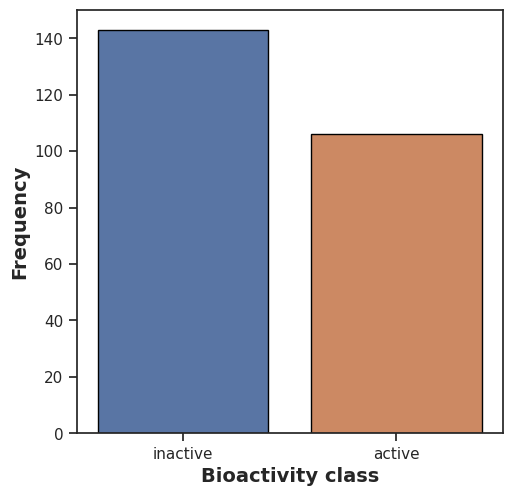

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

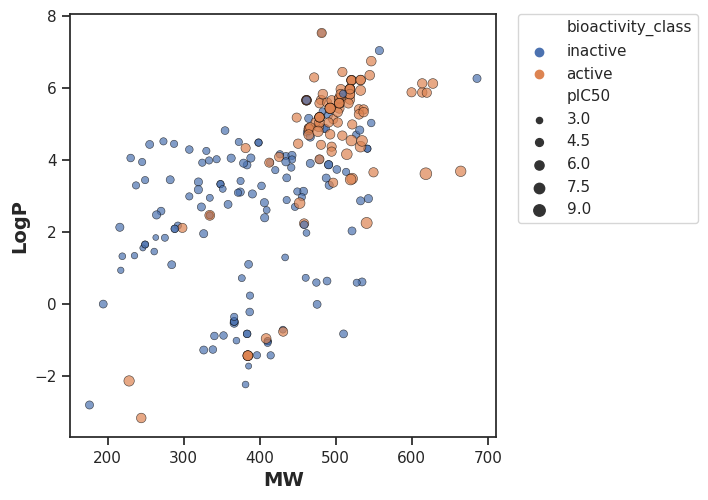

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

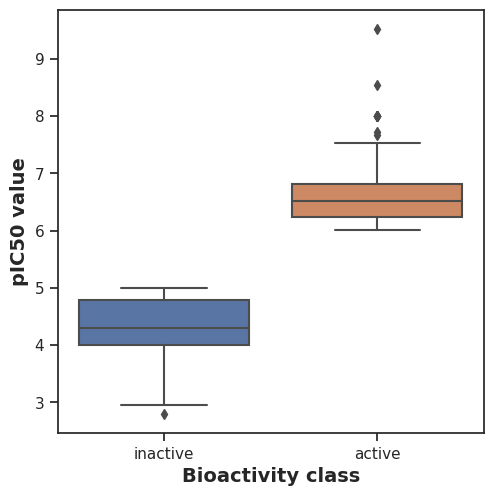

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,15158.00,0.00,0.05,Different distribution (reject H0)


#### **MW**

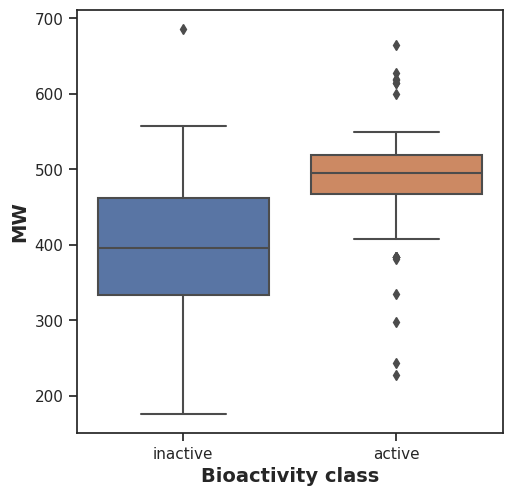

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,12286.00,0.00,0.05,Different distribution (reject H0)


#### **LogP**

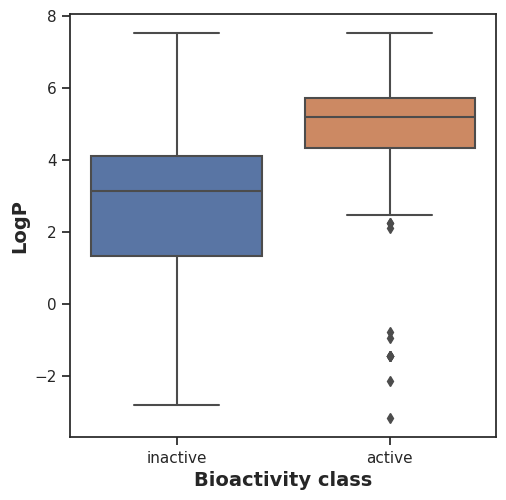

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,11851.00,0.00,0.05,Different distribution (reject H0)


#### **NumHDonors**

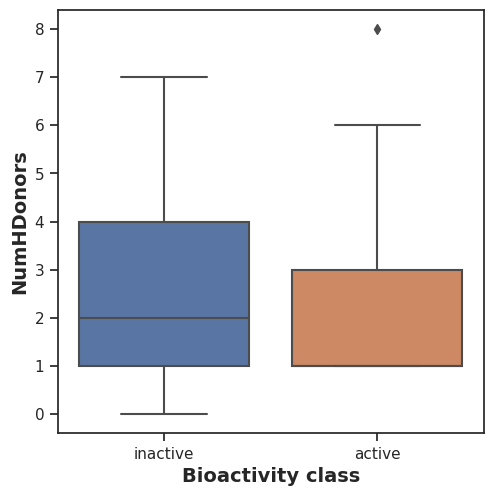

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,6633.50,0.08,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

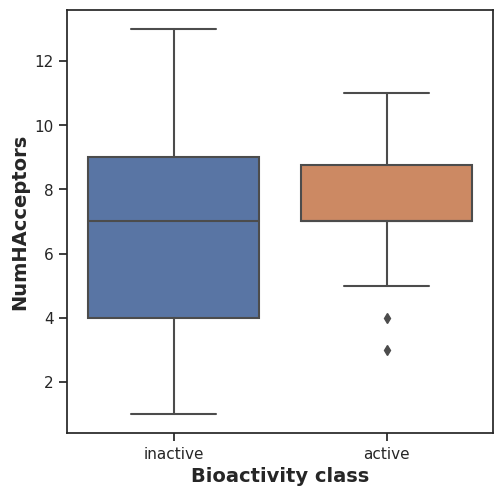

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,9417.50,0.00,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: gdrive
  adding: plot_MW_vs_LogP.pdf (deflated 10%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 36%)
  adding: bioactivity_preprocessed_data.csv (deflated 79%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: bioactivity_data.csv (deflated 91%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 37%)


# *Descriptor Calculation and Dataset Preparation*


HERE will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building.

---

## **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-05-27 18:52:44--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-05-27 18:52:44--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   150MB/s    in 0.2s    

2023-05-27 18:52:45 (150 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-05-27 18:52:45--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

## **Load bioactivity data**

Load the previoud preprocessed data

In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_csv('bioactivity_preprocessed_data.csv')

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL382617,Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1,inactive,100000.00
1,CHEMBL383475,O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,inactive,50000.00
2,CHEMBL418052,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O...,intermediate,2000.00
3,CHEMBL563570,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](...,inactive,300000.00
4,CHEMBL559715,N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3c(=O)[nH]cnc32...,inactive,1000000.00
...,...,...,...,...
467,CHEMBL4850570,COc1cc2nc(-c3cc(C)oc3C)cc(NCC3CCN(c4ncc(C(=O)N...,active,10.00
468,CHEMBL4871621,COc1cc2nc(-c3ccc(C)s3)cc(NCC3CCN(c4ncc(C(=O)NO...,active,10.00
469,CHEMBL4854765,COc1cc2nc(-c3ccc(C)o3)nc(NCC3CCN(c4ncc(C(=O)NO...,active,10.00
470,CHEMBL1564869,O=C(O)[C@H](Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O,active,115.00


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

Cc1ccn2c(CCc3nnc4cc(C)ccn34)nnc2c1	CHEMBL382617
O=C(O)C(Cc1c[nH]c2ccccc12)N1C(=O)c2ccccc2C1=O	CHEMBL383475
Nc1ncnc2c1ncn2[C@@H]1O[C@H](CSCC[C@H](N)C(=O)O)[C@@H](O)[C@H]1O	CHEMBL418052
N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3cncnc32)[C@H](O)[C@@H]1O)C(=O)O	CHEMBL563570
N[C@@H](CCSC[C@H]1O[C@@H](n2cnc3c(=O)[nH]cnc32)[C@H](O)[C@@H]1O)C(=O)O	CHEMBL559715


In [ ]:
! cat molecule.smi | wc -l

472


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL383475 in molecule.smi (2/472). 
Processing CHEMBL382617 in molecule.smi (1/472). 
Processing CHEMBL418052 in molecule.smi (3/472). Average speed: 3.07 s/mol.
Processing CHEMBL563570 in molecule.smi (4/472). Average speed: 1.77 s/mol.
Processing CHEMBL559715 in molecule.smi (5/472). Average speed: 1.34 s/mol.
Processing CHEMBL561047 in molecule.smi (6/472). Average speed: 1.03 s/mol.
Processing CHEMBL552246 in molecule.smi (8/472). Average speed: 0.79 s/mol.
Processing CHEMBL552309 in molecule.smi (7/472). Average speed: 0.92 s/mol.
Processing CHEMBL563946 in molecule.smi (9/472). Average speed: 0.89 s/mol.
Processing CHEMBL538692 in molecule.smi (10/472). Average speed: 0.76 s/mol.
Processing CHEMBL564768 in molecule.smi (11/472). Average speed: 0.76 s/mol.
Processing CHEMBL558882 in molecule.smi (12/472). Average speed: 0.69 s/mol.
Processing CHEMBL560045 in molecule.smi (13/472). Average speed: 0.62 s/mol.
Processing CHEMBL560165 in molecule.smi (14/472). Average sp

In [ ]:
! ls -l

ls: cannot access 'gdrive': Transport endpoint is not connected
total 109744
-rw-r--r-- 1 root root   262029 May 27 18:48 bioactivity_data.csv
-rw-r--r-- 1 root root    41322 May 27 18:48 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root   850464 May 27 18:55 descriptors_output.csv
drwx------ 5 root root     4096 May 27 18:50 drive
d????????? ? ?    ?           ?            ? gdrive
drwxr-xr-x 3 root root     4096 May 27 18:52 __MACOSX
-rw-r--r-- 1 root root      124 May 27 18:52 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      122 May 27 18:52 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      131 May 27 18:52 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      129 May 27 18:52 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      125 May 27 18:52 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root    33005 May 27 18:53 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL382617,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL383475,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL418052,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL563570,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL559715,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,CHEMBL4850570,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,CHEMBL4871621,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,CHEMBL4854765,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470,CHEMBL1564869,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
468,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
469,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
470,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [ ]:
df3_Y = df_2class['pIC50']
df3_Y

0     4.00
1     4.30
3     3.52
4     3.00
5     4.35
      ... 
467   8.00
468   8.00
469   8.00
470   6.94
471   6.42
Name: pIC50, Length: 249, dtype: float64

## **Combining X and Y variable**

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.00
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,NaN
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.52
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.00
468,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.00
469,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.00
470,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.94


In [ ]:
dataset3.to_csv('DNMT1_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

# **Download the CSV file to your local computer for the (Model Building).**

# **Regression Models with Random Forest**

Here we will be building a machine learning model using the ChEMBL bioactivity data.


---

## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
df = pd.read_csv('DNMT1_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.522879
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.346787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
245,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
246,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
247,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.939302


## **3. Input features**
  

### **3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
245,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
246,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
247,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
Y = df.pIC50
Y

0     4.00
1     4.30
2     3.52
3     3.00
4     4.35
      ... 
244   8.00
245   8.00
246   8.00
247   6.94
248   6.42
Name: pIC50, Length: 249, dtype: float64

### **3.3. examine the data dimension**

1.   List item
2.   List item



In [ ]:
X.shape

(249, 881)

In [ ]:
Y.shape

(249,)

### **3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(249, 162)

## **4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((199, 162), (199,))

In [ ]:
X_test.shape, Y_test.shape

((50, 162), (50,))

## **5. Building a Regression Model using Random Forest**

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.39282268071799853

In [ ]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

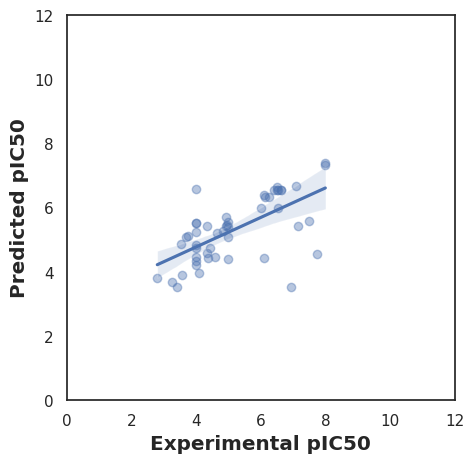

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show
plt.savefig('Scatter Plot of Experimental vs Predicted pIC50 Values.pdf')

# **Comparing Regressors**

Here we will be comparing several ML algorithms for build regression models of target protein inhibitors.



## **1. Import libraries**

In [ ]:
!pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 24.8 MB 1.4 MB/s 
     |████████████████████████████████| 96 kB 5.1 MB/s 
     |████████████████████████████████| 255.9 MB 36 kB/s 
     |████████████████████████████████| 297 kB 54.0 MB/s 
     |████████████████████████████████| 2.0 MB 47.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 


In [ ]:
!pip show lazypredict


Name: lazypredict
Version: 0.2.12
Summary: Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning
Home-page: https://github.com/shankarpandala/lazypredict
Author: Shankar Rao Pandala
Author-email: shankar.pandala@live.com
License: MIT license
Location: /usr/local/lib/python3.7/site-packages
Requires: scikit-learn, lightgbm, xgboost, pandas, click, joblib, tqdm
Required-by: 


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [ ]:
df = pd.read_csv('DNMT1_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [ ]:
# Examine X dimension
X.shape

(249, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(249, 162)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
model_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
model_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:35<00:00,  1.17it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:33<00:00,  1.27it/s]


In [ ]:
# Performance table of the training set (80% subset)
predictions_test




,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,2053712180264361754761859274304619806720.00,-4736111762650467107382206322798218969088.00,88468966469585059840.00,0.13
LinearRegression,5571475180575995279179776.00,-12848503987858928283156480.00,4607934152368.56,0.09
TransformedTargetRegressor,5571475180575995279179776.00,-12848503987858928283156480.00,4607934152368.56,0.05
RANSACRegressor,45051954819595744837632.00,-103895324379884065652736.00,414360152491.81,3.34
KernelRidge,8.10,-15.37,5.20,0.03
GaussianProcessRegressor,4.74,-7.63,3.78,0.04
QuantileRegressor,1.49,-0.13,1.37,2.11
Lasso,1.44,-0.01,1.29,0.03
DummyRegressor,1.44,-0.01,1.29,0.04


In [ ]:
# Performance table of the test set (20% subset)
predictions_train



,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.43,0.90,0.42,0.10
DecisionTreeRegressor,0.43,0.90,0.42,0.03
ExtraTreeRegressor,0.43,0.90,0.42,0.07
ExtraTreesRegressor,0.43,0.90,0.42,0.61
XGBRegressor,0.43,0.90,0.42,1.35
TransformedTargetRegressor,0.16,0.85,0.51,0.05
LinearRegression,0.16,0.85,0.51,0.03
GradientBoostingRegressor,0.14,0.84,0.52,0.32
RandomForestRegressor,0.11,0.84,0.52,0.68


## **5. Data visualization of model performance**

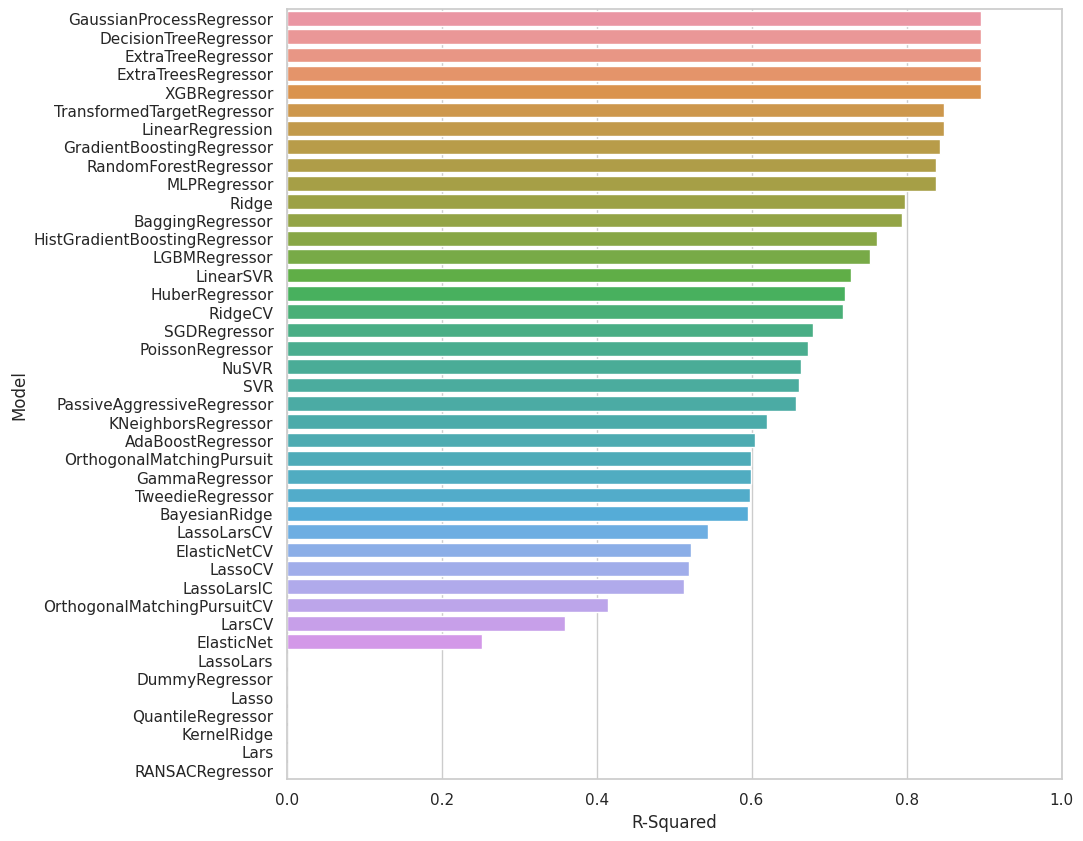

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('Bar plot of R-squared values.pdf')

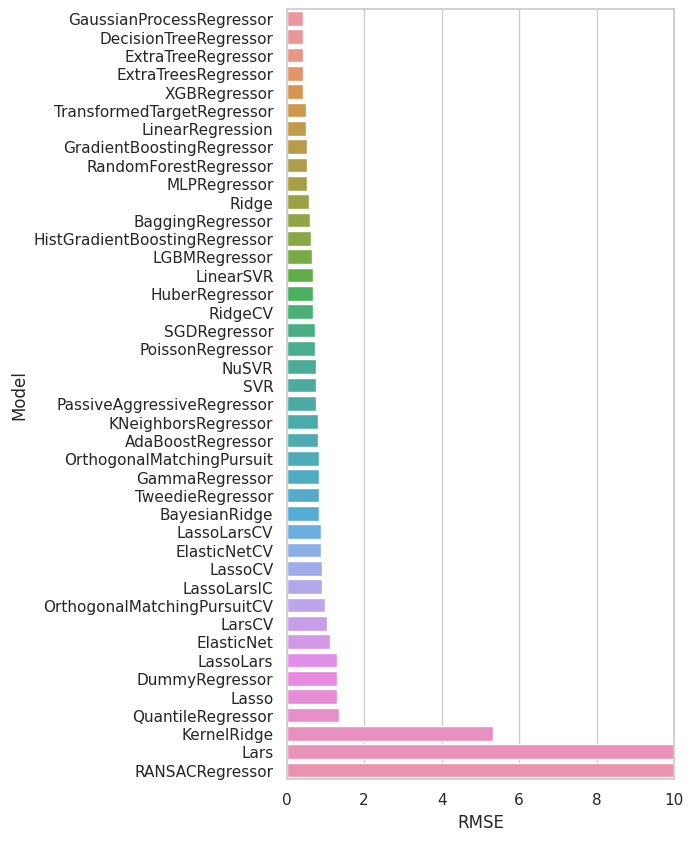

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('Bar plot of RMSE values.pdf')

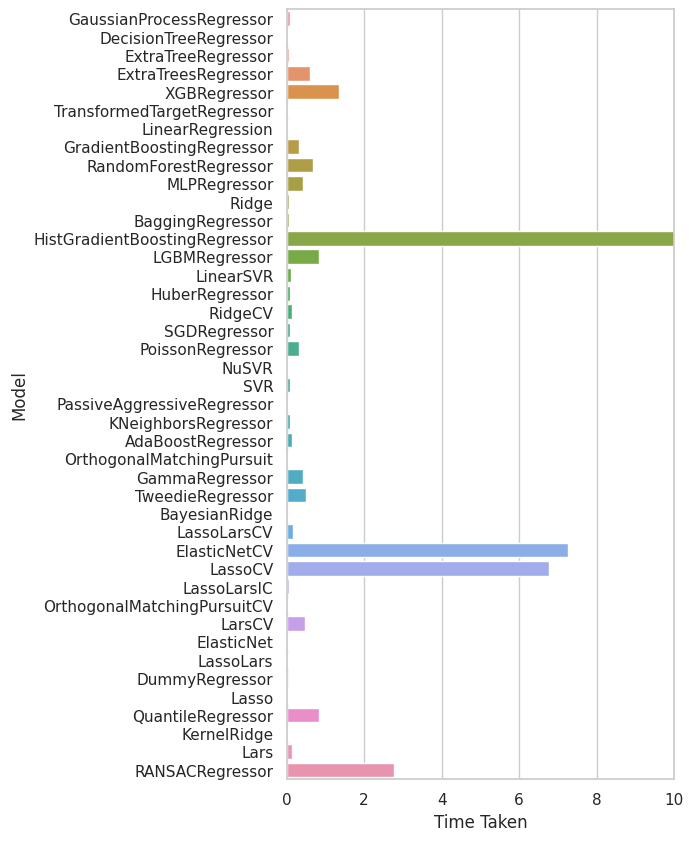

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('Bar plot of Calculation time.pdf')